# ORIE 4580/5580/5581 Assignment 4

#### Students: Shiyu Chen (sc3283) and Mingyi Yao (my533)



### Instructions


* Due Friday September 29, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
import numpy as np
import scipy.stats as stats
import scipy
from scipy.stats import norm
from scipy.linalg import cholesky
import matplotlib.pyplot as plt




---
---


# Question 1: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


___
## Ans.



In [ ]:
# Fristly, convert to standard normal distribution for both three bonds variables.
mu = [0.14, 0.07, 0.16]
sigma_2 = [0.0625, 0.01, 0.09]
sigma = [np.sqrt(x) for x in sigma_2]
z = [(0-x)/y for x,y in zip(mu, sigma)] # standardized normal variables
probabilities = [1 - norm.cdf(x) for x in z]
res = 1
for prob in probabilities:
  res = res * prob

print('The probability of all three financial products simultaneously yield a positive return is:', res)


The probability of all three financial products simultaneously yield a positive return is: 0.3796164056673423


___

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
___

## Ans:
By using Cholesky decomposition, we can convert uncorrelated random variables into correlated random variables by make use of the covairance matrix.

In [ ]:
mu = np.array([0.14, 0.07, 0.16])
sigma = np.array([[0.0625, -0.01, 0.0375],
                  [-0.01, 0.01, -0.015],
                  [0.0375, -0.015, 0.09]])

# Cholesky decomposition
L = scipy.linalg.cholesky(sigma, lower=True)


num_simulations = 10000
success_count = 0

for _ in range(num_simulations):
    z = np.random.randn(3) # standardized normal variables
    correlated_returns = z @ L.T
    correlated_returns += mu # add previous mean values
    if all(correlated_returns > 0):
        success_count += 1

estimated_probability = success_count / num_simulations

print("Estimated Probability:", estimated_probability)


Estimated Probability: 0.373


___
___

# Question 2: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

___

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.
___


$V1 \sim U(-\sqrt 3, \sqrt 3)$ \\

$V2 \sim U(-\sqrt 3, \sqrt 3)$



## Ans.

For uniform distribution $X \sim U[\alpha, \beta]$, the formula for the mean is $E(X) = \frac{\alpha+\beta}{2}$, variance is $Var(X) = \frac{(\beta-\alpha)^2}{12}$. Since in this problem mean = 0, variance = 1, therefore, the value of $\alpha = -\sqrt 3, \beta = \sqrt 3$. Then calculate the value of $\sigma_{12}$. Because we have $E(V_1) = 0$ and $E(V_2) = 0$. Then we have:

$$
\operatorname{Cov}\left(V_1, V_2\right)=\mathbb{E}\left[\left(V_1-\mathbb{E}\left[V_1\right]\right)\left(V_2-\mathbb{E}\left[V_2\right]\right)\right] = \mathbb{E}\left[V_1 \cdot V_2\right]
$$
By using the definition of expectation, we have:
$$
\operatorname{Cov}\left(V_1, V_2\right)=\int_\alpha^\beta \int_\alpha^\beta v_1 v_2 \cdot f(v_1, v_2) d v_1 d v_2 = \sigma_{12}$$



___

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?
___

$$
\begin{aligned}
E\left[V_2\right]=E\left[(1-B) X_1+B X_2\right] & \left.=E_B\left[E\left[(1-B) X_1+B X_2\right) \mid B=b\right]\right] \\
& =E_B\left[(1-b) E\left(X_1\right)+b E\left[X_2\right]\right] \\
 & =E_B\left[(1-b) \frac{\alpha+\beta}{2}+b \cdot \frac{\alpha+\beta}{2}\right] \\
& =\frac{\alpha+\beta}{2} = 0
\end{aligned}
$$

$$
\begin{aligned}
\operatorname{Var}\left(\operatorname{V}_2\right)& =\operatorname{Var}\left[(1-B) X_1+B X_2\right] \\
& =\operatorname{Var}\left[E\left[(1-B) X_1+B X_2 \mid B\right]\right]+E\left[\operatorname{Var}\left[(1-B) X_1+B X_2 \mid B\right]\right] \\
& =\operatorname{Var}\left[(1-B) \frac{\alpha+\beta}{2}+B \frac{\alpha+\beta}{2}\right]+E\left[(1-B)^2 \operatorname{Var}\left(X_1\right)+B^2 \operatorname{Var}\left(X_2\right)+2 B(1-B) \operatorname{Cov}\left(X_1, X_2\right)\right] \\
& =0+E\left[2 B^2-2 B+1 + 2B(1-B) \sigma_{12}\right] \\
& \operatorname{Var}(B)=E\left[B^2\right]-(E[B])^2 \\
& \Rightarrow E\left[B^2\right]=p(1-p)+p^2=p \\
& \text { Then } \operatorname{Var}\left(V_2\right)=2 p-2 p+1 + 2 \sigma_{12} (p-p)=1 \\
&
\end{aligned}
$$

___
**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?
___

## Ans.
$$
\begin{aligned}
& \operatorname{Cov}\left(V_1, V_2\right)=\operatorname{Cov}\left(X_1,(1-B) X_1+B X_2\right) \\
& \left.=E\left[\left(X_1\right)((1-B) X_1+B X_2\right)\right] \\
& =E\left[(1-B) X_1^2+B X_1 X_2\right] \\
& =E_B\left[E\left[(1-B) X_1^2+B X_1 X_2 \mid B\right]\right. \\
& =E_B\left[(1-B) \cdot 1+B E\left[X_1 X_2\right]\right] \\
& \text{since we generate X_1,X_2, we can assume they are independent }\\
& =E[1-B]=1-E[B]+0=1-p = \sigma_{12} \\
& \Rightarrow p = 1-\sigma_{12}
&
\end{aligned}
$$

___

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

___

The Gaussian copula may be generated by first obtaining a set of correlated normally distributed variates $v_1$ and $v_2$ using Choleski's decomposition, and then transforming these to uniform variables $u_1=\Phi\left(v_1\right)$ and $u_2=\Phi\left(v_2\right)$, where $\Phi$ is the cumulative standard normal. Then, the pair $\left(u_1, u_2\right)$ represents draws from the Gaussian copula.

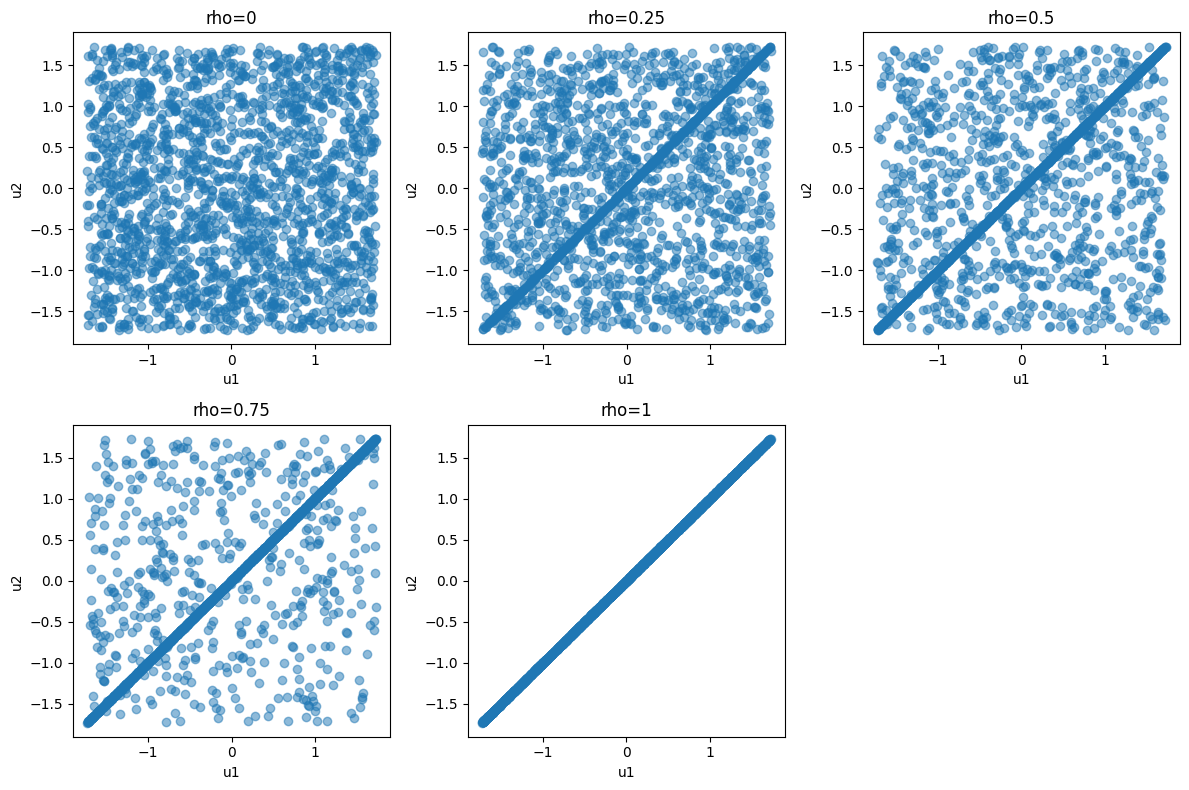

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

rho_values = [0, 0.25, 0.5, 0.75, 1]  # Desired correlation values
N = 2000    # Number of samples
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, rho in enumerate(rho_values):
  p = 1 - rho
  x = np.random.uniform(-math.sqrt(3), math.sqrt(3), size=N)
  y = np.random.uniform(-math.sqrt(3), math.sqrt(3), size=N)
  B = np.random.choice([0, 1], size=N, p=[1-p, p])
  u1 = x
  u2 = (1-B)*x + B*y
  row = i // 3
  col = i % 3
  axes[row, col].scatter(u1, u2, alpha=0.5)
  axes[row, col].set_xlabel('u1')
  axes[row, col].set_ylabel('u2')
  axes[row, col].set_title(f'rho={rho}')
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()



___

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').
___

## Ans.

In [ ]:
from scipy.stats import multivariate_normal

p = 1 - 0.5
x = np.random.uniform(-math.sqrt(3), math.sqrt(3), size=N)
y = np.random.uniform(-math.sqrt(3), math.sqrt(3), size=N)
B = np.random.choice([0, 1], size=N, p=[1-p, p])
u1 = x
u2 = (1-B)*x + B*y
s = 0
for i in range(N):
  if u1[i] <= 0 and u2[i] <= 0:
    s += 1
prob = s/N
print(f"P[V1 <= 0, V2 <= 0] = {prob:.4f}")

P[V1 <= 0, V2 <= 0] = 0.3780


___

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

___

For each $W_1$ and $W_2$, we calculate the cdf for each of them and then determine its distribution. \\

$P(W_1 < w) = P(\alpha + (\beta-\alpha)\phi(Z_1) < w) = P(\phi(Z_1) < \frac{w-\alpha}{\beta-\alpha}) = P( \phi^{-1}(\phi(Z_1)) < \phi^{-1}(\frac{w-\alpha}{\beta-\alpha}) ) = P(Z_1 < \phi^{-1}(\frac{w-\alpha}{\beta-\alpha})) = \phi(\phi^{-1}(\frac{w-\alpha}{\beta-\alpha})) = \frac{w-\alpha}{\beta-\alpha}$ \\
For a uniformly distributed variable $W \sim U(\alpha, \beta)$, its cumulative density function $P(W \leq w)$is $ \frac{w-\alpha}{\beta-\alpha}$. This proves that $W_1$ follows $U(\alpha, \beta)$.
And the argument is the same for $W_2$. \\
Therefore, the construction of $W_1$ and $W_2$ ensures that they are uniformly distributed on the interval $[\alpha, \beta]$.

P[W1 >= 0, W2 >= 0] = 0.3390


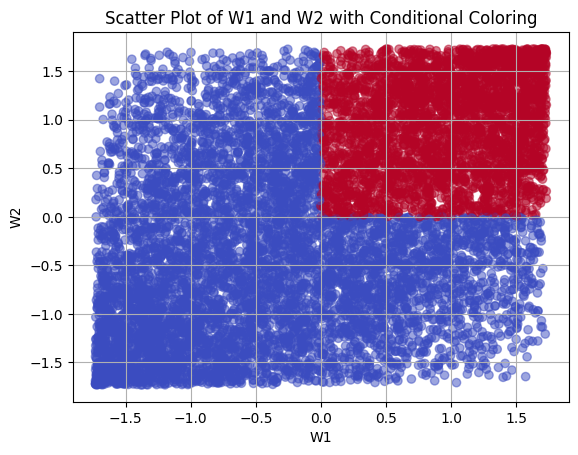

In [ ]:
from scipy.stats import norm
# firstly, generate Z_1, Z_2
alpha = -np.sqrt(3)
beta = np.sqrt(3)
mean = [0, 0]
cov_matrix = [[1, 0.5], [0.5, 1]]
mvn = multivariate_normal(mean=mean, cov=cov_matrix)
samples = mvn.rvs(size=10000)
cdf_value_Z1 = norm.cdf(samples[:,0], loc=0, scale=1)
cdf_value_Z2 = norm.cdf(samples[:,1], loc=0, scale=1)
W1 = alpha + (beta-alpha)*cdf_value_Z1
W2 = alpha + (beta-alpha)*cdf_value_Z2

condition = (W1 >= 0) & (W2 >= 0)
plt.scatter(W1, W2, c=condition, cmap='coolwarm', alpha=0.5)
plt.xlabel('W1')
plt.ylabel('W2')
plt.title('Scatter Plot of W1 and W2 with Conditional Coloring')
plt.grid(True)

probability = np.mean(condition)
print(f"P[W1 >= 0, W2 >= 0] = {probability:.4f}")




## Ans.


___
___

# Question 3: Generating random samples in some given set (20 pts)

___

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).
___

## Ans.

Since for a standard normal distributed random variable $X$, the value of X is $X = x \in \mathbb{R}$, the pdf of $X$ is $\frac{1}{\sqrt{2 \pi}}e^{-x^2/2}$. Therefore, we can generate $X \sim N(0,1)$, and let the upper bound of $Y$ to be pdf(x) * $\sqrt{2 \pi}$.

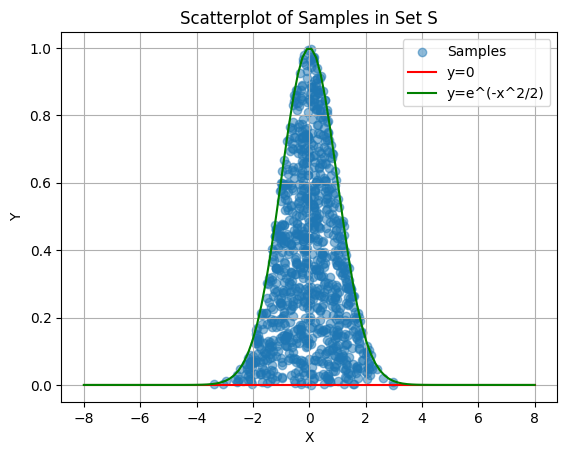

In [ ]:
X = np.random.normal(0, 1, 1000)
Y = np.random.uniform(0, np.exp(-X**2/2), 1000)


plt.scatter(X, Y, alpha=0.5, label='Samples')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of Samples in Set S')

x_range = np.linspace(-8, 8, 100)
plt.plot(x_range, np.zeros_like(x_range), 'r', label='y=0')
plt.plot(x_range, np.exp(-x_range**2/2), 'g', label='y=e^(-x^2/2)')

plt.legend()
plt.grid(True)
plt.show()

___
**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).
___

## Ans.

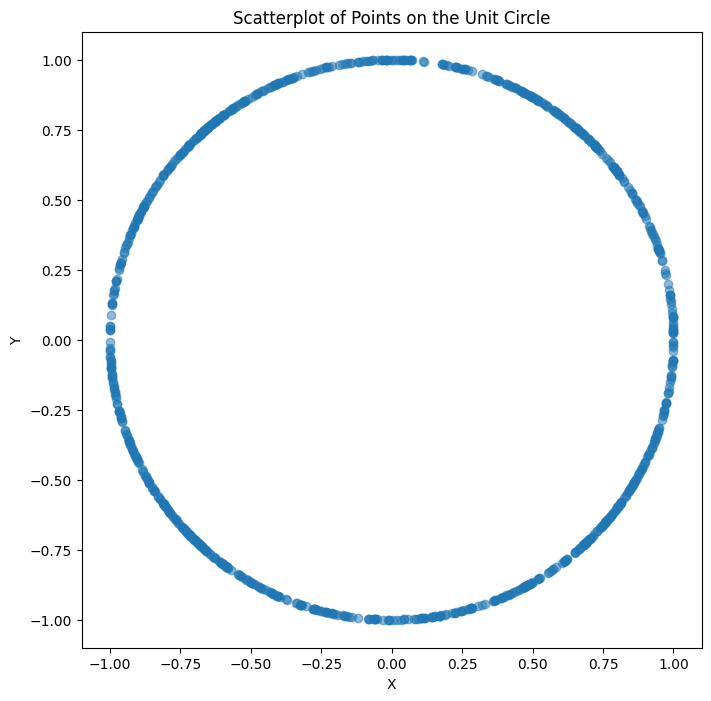

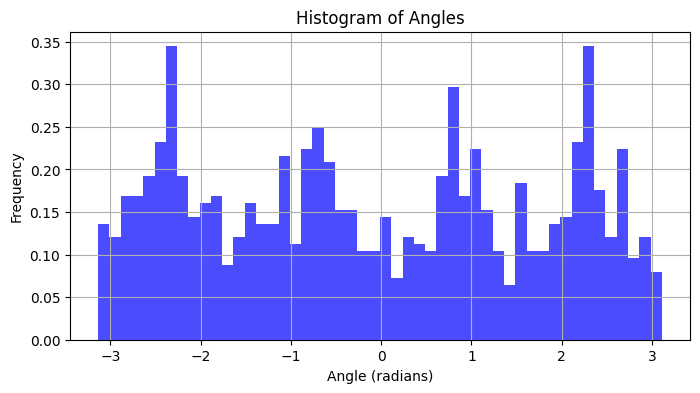

Since the range of arctan2 function will return [-pi, pi]. It seems the points do not falls uniformly.


In [ ]:
N = 1000
U = np.random.uniform(-1, 1, size=N)
V = np.random.uniform(-1, 1, size=N)
X = U / np.sqrt(U**2 + V**2)
Y = V / np.sqrt(U**2 + V**2)
angles = np.arctan2(Y, X)
plt.figure(figsize=(8, 8))
plt.scatter(X, Y, alpha=0.5, label='Samples on Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of Points on the Unit Circle')

plt.figure(figsize=(8, 4))
plt.hist(angles, bins=50, density=True, alpha=0.7, color='b')
plt.xlabel('Angle (radians)')
plt.ylabel('Frequency')
plt.title('Histogram of Angles')
plt.grid(True)

plt.show()
print('Since the range of arctan2 function will return [-pi, pi]. It seems the points do not falls uniformly.')



---

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$, and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

___

## Ans.

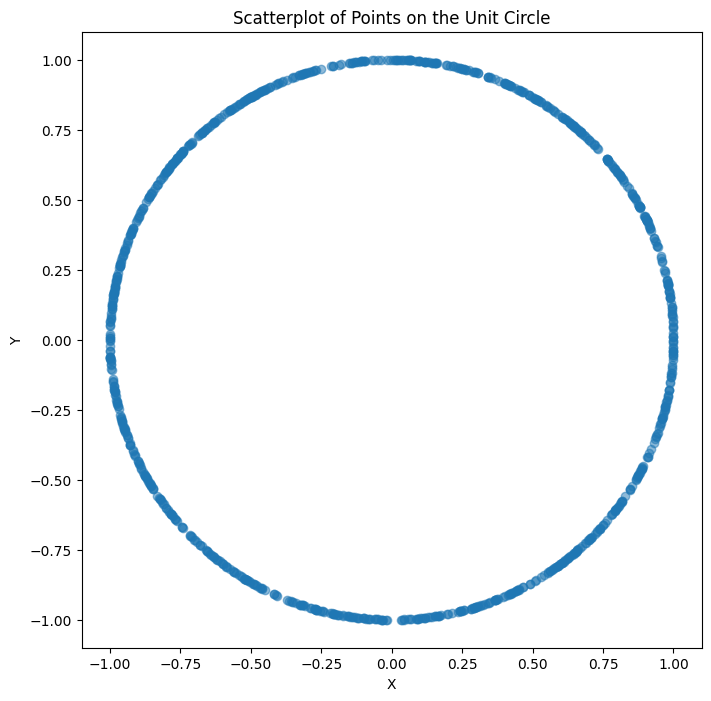

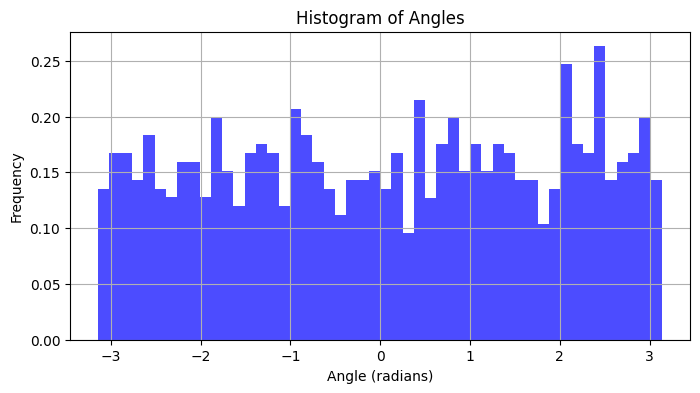

in (c), points are more likely to be uniformly distributed on the circle. Also do the angles.


In [ ]:
mean = [0, 0]
cov_matrix = np.eye(2)
mvn = multivariate_normal(mean=mean, cov=cov_matrix)
samples = mvn.rvs(size=1000)
Z = samples[:, 0]
W = samples[:, 1]
X = Z / np.sqrt(Z**2+W**2)
Y = W / np.sqrt(Z**2+W**2)
angles = np.arctan2(Y, X)

plt.figure(figsize=(8, 8))
plt.scatter(X, Y, alpha=0.5, label='Samples on Circle')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of Points on the Unit Circle')

plt.figure(figsize=(8, 4))
plt.hist(angles, bins=50, density=True, alpha=0.7, color='b')
plt.xlabel('Angle (radians)')
plt.ylabel('Frequency')
plt.title('Histogram of Angles')
plt.grid(True)

plt.show()
print('in (c), points are more likely to be uniformly distributed on the circle. Also do the angles.')

___
___

# Question 4: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1,000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

___

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.
___


## Ans.

In [ ]:
import scipy.stats as stats
passengers = np.random.uniform(0, 1000, size = 10000)
passengers = sorted(passengers)
thresholds = np.linspace(10, 1000, 100)
grouped_indices = np.digitize(passengers, thresholds)
groups = [[] for _ in range(len(thresholds))]
for i, index in enumerate(grouped_indices):
    groups[index].append(passengers[i]-(index)*10)
# we need to calculate the total average so we need to sum over all the waiting times
lst = groups[0]
for i in range(1,100):
  lst += groups[i]
#print(len(lst))
mean_waiting = np.mean(lst)
sample_std = np.std(lst, ddof=1)
ci = stats.t.interval(0.95, df = 9999, loc = mean_waiting, scale = sample_std/np.sqrt(9999))
print('mean waiting time for all the passengers is:', mean_waiting)
print('confidence interval for waiting time is: ({:.2f}, {:.2f})'.format(ci[0], ci[1]))

mean waiting time for all the passengers is: 4.993628942160972
confidence interval for waiting time is: (4.94, 5.05)


___
**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.
___


In [ ]:
passengers = np.random.uniform(0, 1000, size = 10000)
passengers = sorted(passengers)
interarrival_times = np.random.exponential(scale=10, size=1000)
arrival_times = np.cumsum(interarrival_times)
thresholds = arrival_times[arrival_times<=1000]
add = arrival_times[arrival_times>1000][0]
grouped_indices = np.digitize(passengers, thresholds)
thresholds = np.concatenate([thresholds, [add]])
groups = [[] for _ in range(grouped_indices[-1]+1)]

for i, index in enumerate(grouped_indices):
  time = thresholds[index] - passengers[i]
  groups[index].append(time)
# we need to calculate the total average so we need to sum over all the waiting times
lst = groups[0]
for i in range(1,grouped_indices[-1]+1):
  lst += groups[i]
print(len(lst))
mean_waiting = np.mean(lst)
sample_std = np.std(lst, ddof=1)
ci = stats.t.interval(0.95, df = 9999, loc = mean_waiting, scale = sample_std/np.sqrt(9999))
print('mean waiting time for all the passengers is:', mean_waiting)
print('confidence interval for waiting time is: ({:.2f}, {:.2f})'.format(ci[0], ci[1]))

10000
mean waiting time for all the passengers is: 10.375817691730985
confidence interval for waiting time is: (10.15, 10.60)


## Ans.

___

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

___

In [ ]:
interarrival_times = np.random.exponential(scale=10, size=10000)
arrival_times = np.cumsum(interarrival_times)
num = sum(arrival_times<=1000)
bus = interarrival_times[0:num]
mean_waiting = np.mean(bus)
sample_std = np.std(bus, ddof=1)
ci = stats.t.interval(0.95, df = num-1, loc = mean_waiting, scale = sample_std/np.sqrt(num-1))
print('mean time for the inter-arrival is:', mean_waiting)
print('confidence interval for waiting time is: ({:.2f}, {:.2f})'.format(ci[0], ci[1]))

mean time for the inter-arrival is: 10.0336585139675
confidence interval for waiting time is: (7.98, 12.09)


The mean time for the inter-arrivals between trains are around 10 minutes, and the upper boudnfor condidence interval is around 12.

___

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

___

## Ans.

For this question, we record the inter-arrival time instead of waiting time. So I modify the code used in (a) and (b) to record the inter-arrival time.

for case in (a), since every train arrival in a regular time interval, therefore, the interarrival time for each two trains is 10 miniues. Thus, the mean value is 10 and the confidence interval is [10, 10].

In [ ]:
# case in (b)

passengers = np.random.uniform(0, 1000, size = 10000)
passengers = sorted(passengers)
interarrival_times = np.random.exponential(scale=10, size=1000)
arrival_times = np.cumsum(interarrival_times)
thresholds = arrival_times[arrival_times<=1000]
add = arrival_times[arrival_times>1000][0]
grouped_indices = np.digitize(passengers, thresholds)
thresholds = np.concatenate([thresholds, [add]])
res = []

for i, index in enumerate(grouped_indices):
  if index == 0:
    time = thresholds[index]
  else: time = thresholds[index] - thresholds[index-1]
  res.append(time)

mean_intervaltime = np.mean(res)
sample_std = np.std(res, ddof=1)
ci = stats.t.interval(0.95, df = 9999, loc = mean_intervaltime, scale = sample_std/np.sqrt(9999))
print('mean waiting time for all the passengers is:', mean_intervaltime)
print('confidence interval for waiting time is: ({:.2f}, {:.2f})'.format(ci[0], ci[1]))

mean waiting time for all the passengers is: 20.289595845155006
confidence interval for waiting time is: (20.00, 20.58)


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

The key distinction lies in the predictability of train arrivals. In the first scenario, train intervals are fixed and predictable, resulting in more consistent waiting times. In contrast, the second scenario introduces randomness in train arrivals, leading to greater variability in passenger waiting times.